# **Análisis PM!0**

# Paqueteria y datos

In [ ]:
#LIBRERIAS
import pandas as pd
import statsmodels.tsa.stattools as sts
import statsmodels.graphics.tsaplots as sgt
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# CARGA DE BASE DE DATOS
PM10 = pd.read_csv("promedios_diarios_PM10 (1).csv")
df = PM10.copy()
df.head()


,date,PM10
0,01/01/2018,46.666667
1,02/01/2018,22.043478
2,03/01/2018,25.823529
3,04/01/2018,59.732620
4,05/01/2018,33.909091


In [ ]:
df.date = pd.to_datetime(df.date, dayfirst=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1096 entries, 0 to 1095
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    1096 non-null   datetime64[ns]
 1   PM10    1096 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 17.2 KB


In [ ]:
df.date.describe()


,date
count,1096
mean,2019-07-02 12:00:00
min,2018-01-01 00:00:00
25%,2018-10-01 18:00:00
50%,2019-07-02 12:00:00
75%,2020-04-01 06:00:00
max,2020-12-31 00:00:00


In [ ]:
# Indexamos
df.set_index("date", inplace=True)
df.index.freq="D"

In [ ]:
df.head()

,PM10
date,
2018-01-01,46.666667
2018-01-02,22.043478
2018-01-03,25.823529
2018-01-04,59.732620
2018-01-05,33.909091


# Análisis descriptivo y exploratorio

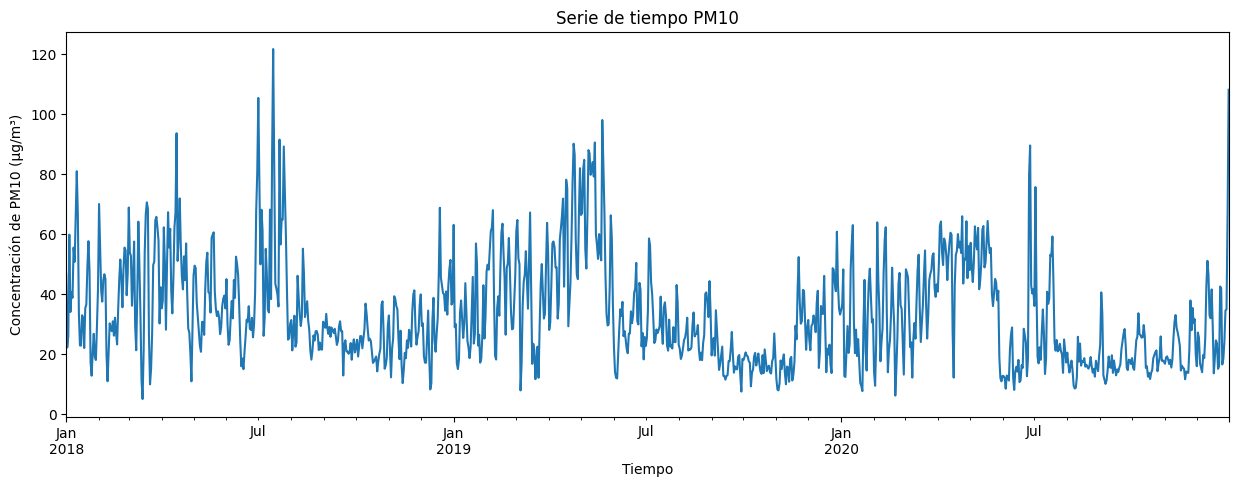

In [ ]:
# Crear el gráfico y obtener el objeto Axes
fig, ax = plt.subplots(figsize=(15, 5))
df.PM10.plot(ax=ax)

# Agregar título al gráfico
ax.set_title('Serie de tiempo PM10')

# Agregar título al eje x
ax.set_xlabel('Tiempo')

# Agregar título al eje y con las unidades de medida
ax.set_ylabel('Concentración de PM10 (µg/m³)')

# Mostrar el gráfico
plt.show()

In [ ]:
# # Extraer componentes de la fecha para el mapa de calor
df['year'] = df.index.year
df['month'] = df.index.month
df['day'] = df.index.day


# Verificar los cambios
print(df.head())

                 PM10  year  month  day  hour
date                                         
2018-01-01  46.666667  2018      1    1     0
2018-01-02  22.043478  2018      1    2     0
2018-01-03  25.823529  2018      1    3     0
2018-01-04  59.732620  2018      1    4     0
2018-01-05  33.909091  2018      1    5     0


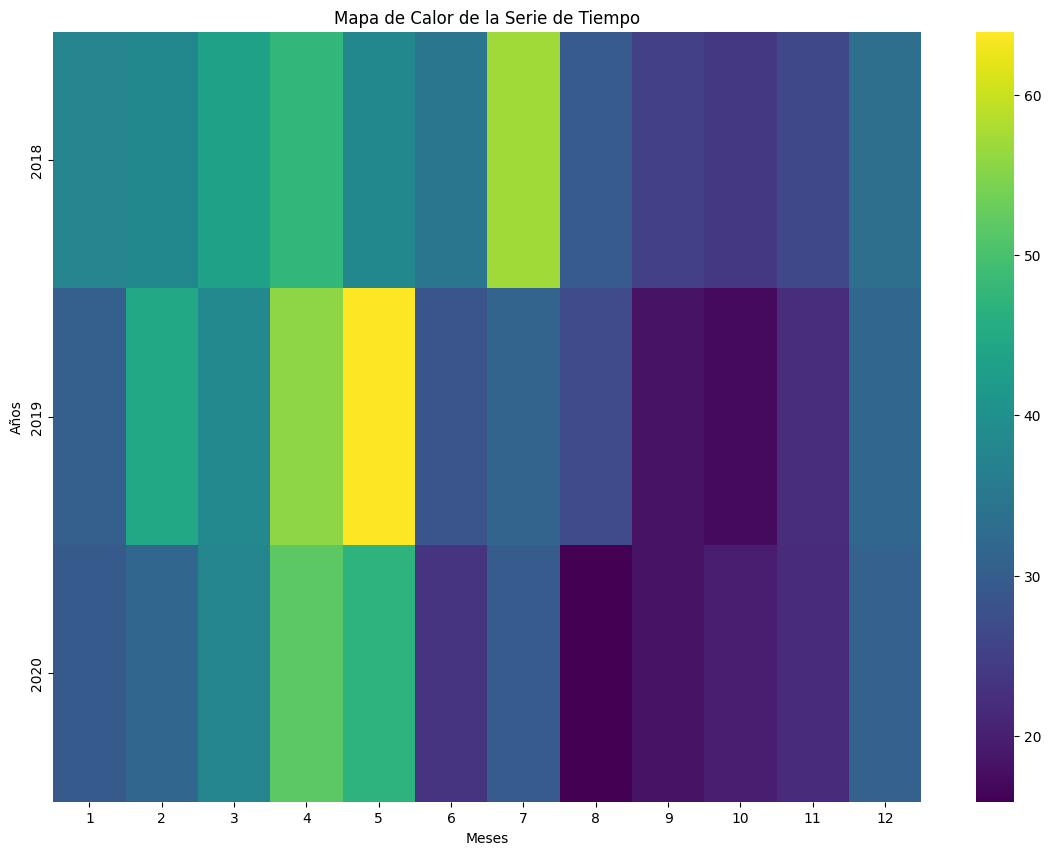

In [ ]:
# Agrupar los datos por mes y hora para el mapa de calor
heatmap_data = df.pivot_table(values='PM10', index=[df.index.year], columns= df.index.month, aggfunc='mean')

# Generar el mapa de calor
plt.figure(figsize=(14, 10))
sns.heatmap(heatmap_data, cmap='viridis', cbar=True)
plt.title('Mapa de Calor de la Serie de Tiempo')
plt.xlabel('Meses')
plt.ylabel('Años')
plt.show()

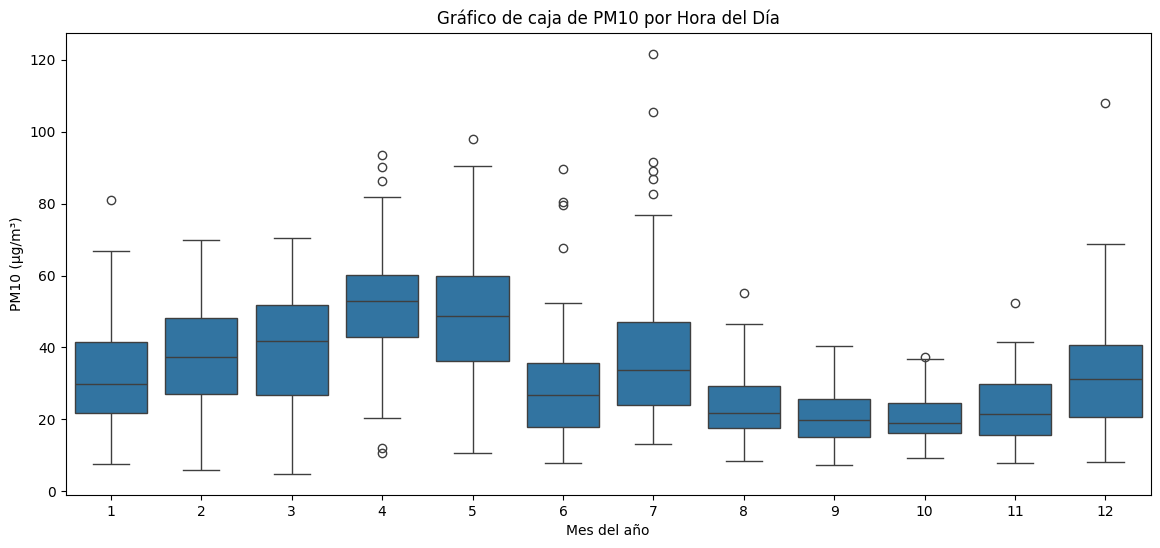

In [ ]:
# Gráfico de violín de PM10 por Hora del Día
plt.figure(figsize=(14, 6))
sns.boxplot(x=df.index.month, y=df['PM10'])
plt.title('Gráfico de caja de PM10 por Hora del Día')
plt.xlabel('Mes del año')
plt.ylabel('PM10 (µg/m³)')
plt.show()


## Descomposición componentes


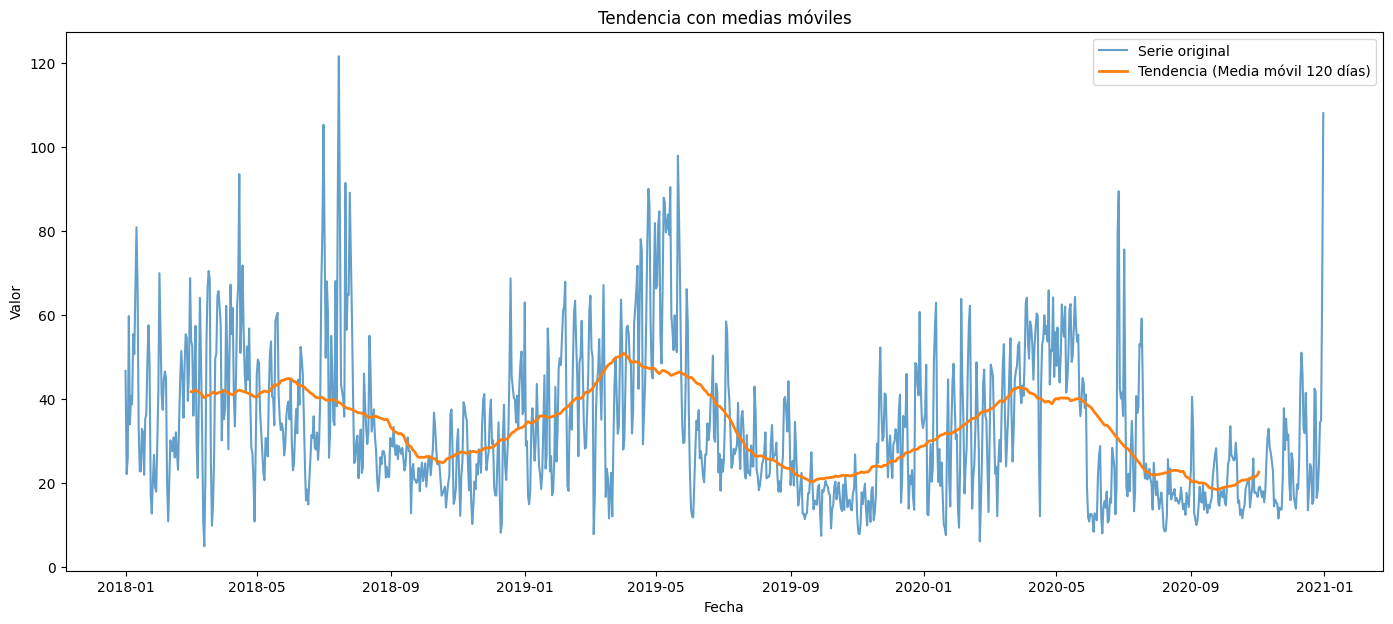

In [ ]:
ventana = 120  # Puedes ajustar el tamaño de la ventana
df['tendencia'] = df['PM10'].rolling(window=ventana, center=True).mean()

# Visualizar la serie original y la tendencia
plt.figure(figsize=(17, 7))
plt.plot(df.index, df['PM10'], label='Serie original', alpha=0.7)
plt.plot(df.index, df['tendencia'], label=f'Tendencia (Media móvil {ventana} días)', linewidth=2)
plt.title('Tendencia con medias móviles')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.legend()
plt.show()

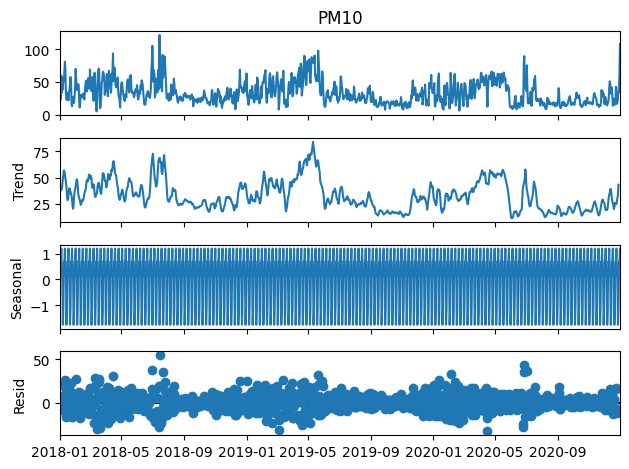

In [ ]:
# Descomposición aditiva
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df.PM10, model='additive')
result.plot();

In [ ]:
from statsmodels.tsa.filters.hp_filter import hpfilter

ts_cycle, ts_trend = hpfilter(df.PM10, lamb=129600)
df["trend"]=ts_trend
df.head()




,PM10,year,month,day,hour,trend
date,,,,,,
2018-01-01,46.666667,2018,1,1,0,39.998135
2018-01-02,22.043478,2018,1,2,0,39.894404
2018-01-03,25.823529,2018,1,3,0,39.790724
2018-01-04,59.732620,2018,1,4,0,39.687009
2018-01-05,33.909091,2018,1,5,0,39.583066


<Axes: xlabel='date'>

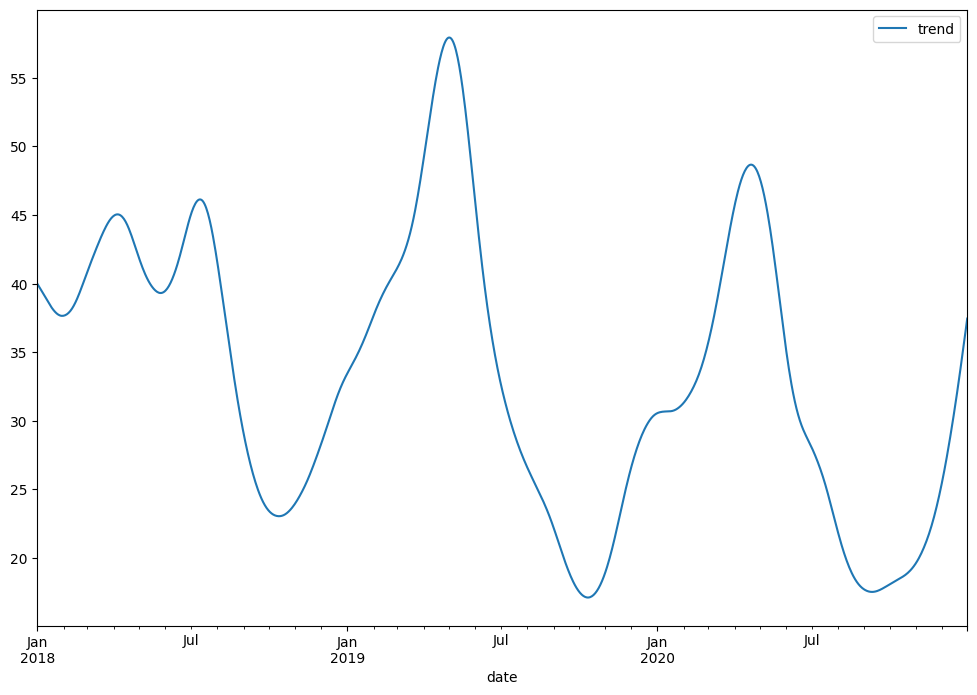

In [ ]:
df[["trend"]].plot(figsize=(12,8))

# Análisis predictivo

## Integrando la serie de tiempo

In [ ]:
# Integramos la serie de tiempo
df['delta'] = df['PM10'].diff()


In [ ]:
df.head()

,PM10,delta
date,,
2018-01-01,46.666667,NaN
2018-01-02,22.043478,-24.623188
2018-01-03,25.823529,3.780051
2018-01-04,59.732620,33.909091
2018-01-05,33.909091,-25.823529


In [ ]:
# Estacionariedad ST integrada
sts.adfuller(df.delta[1:])

(-14.343847006278303,
 1.0490413288451107e-26,
 11,
 1083,
 {'1%': -3.436402509014354,
  '5%': -2.8642124318084456,
  '10%': -2.568192893555997},
 8084.403021817625)

In [ ]:
# Estacionariedad de la ST original
sts.adfuller(df.PM10)

(-4.032967157285023,
 0.0012473905691041864,
 12,
 1083,
 {'1%': -3.436402509014354,
  '5%': -2.8642124318084456,
  '10%': -2.568192893555997},
 8082.317006098479)

In [ ]:

import numpy as np
import pandas as pd
from statsmodels.tsa.stattools import kpss

result = kpss(df.PM10, regression='c', nlags='legacy')

# Mostrar los resultados
print("Estadístico KPSS:", result[0])
print("p-valor:", result[1])
print("Número de rezagos usados:", result[2])
print("Valores críticos:", result[3])

Estadístico KPSS: 0.7139966654836838
p-valor: 0.0122730304105742
Número de rezagos usados: 22
Valores críticos: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}


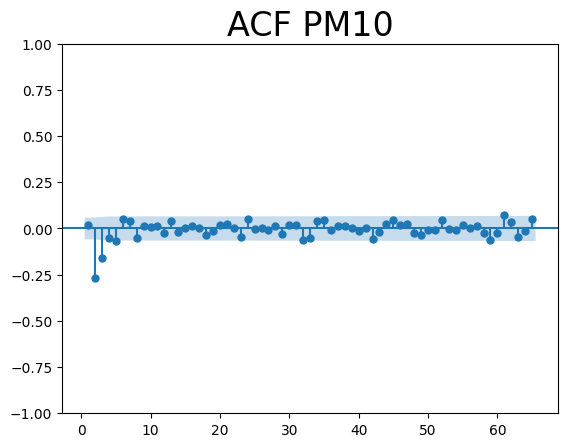

In [ ]:
# Autocorrelación: Relación entre los valores presentes y un periodo de retraso
sgt.plot_acf(df.delta[1:], lags = 65, zero = False)
plt.title("ACF PM10", size = 24)
plt.show()

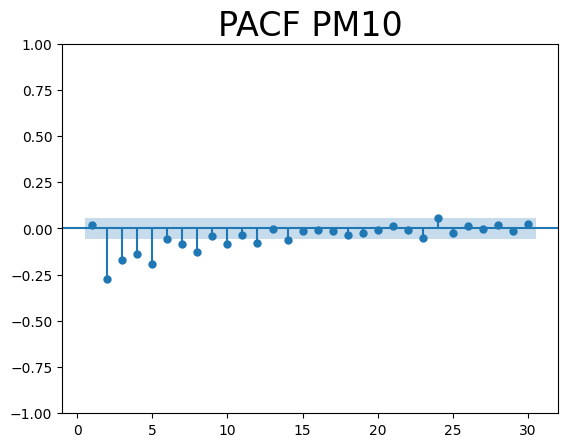

In [ ]:
# Autocorrelación parcial: Nivel de relación de un elemento presente y un periodo pasado sin tener en cuenta la intervención de efectos indirectos
sgt.plot_pacf(df.delta[1:], lags = 30, zero = False, method=("ols"))
plt.title("PACF PM10", size = 24)
plt.show()

In [ ]:
sts.adfuller(df.delta[1:])

(-14.343847006278303,
 1.0490413288451107e-26,
 11,
 1083,
 {'1%': -3.436402509014354,
  '5%': -2.8642124318084456,
  '10%': -2.568192893555997},
 8084.403021817625)

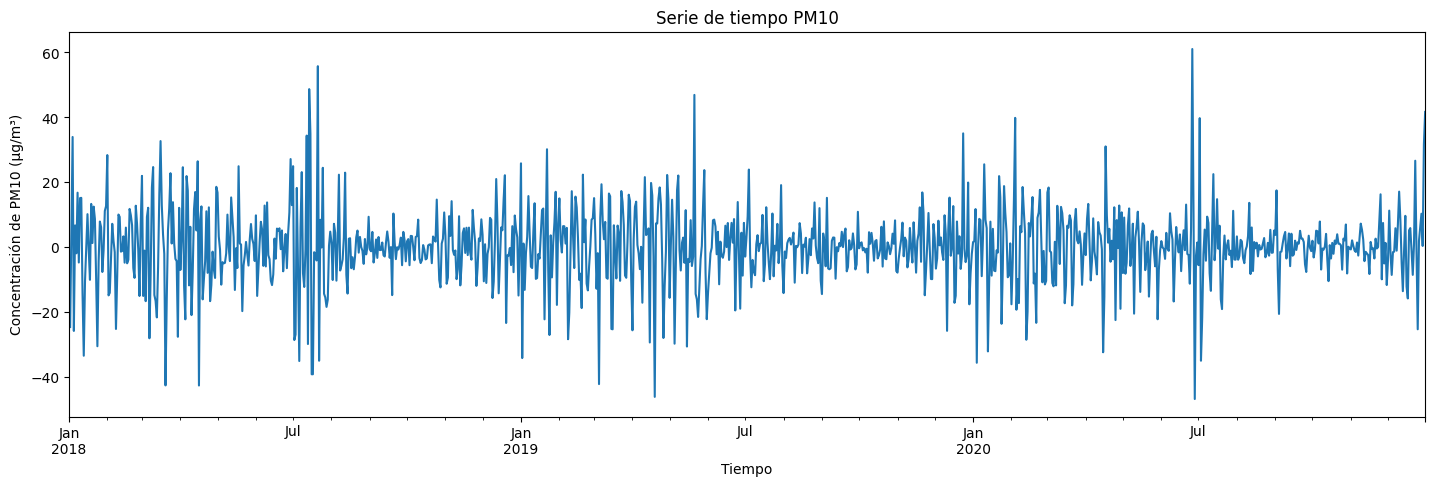

In [ ]:
# Crear el gráfico y obtener el objeto Axes
fig, ax = plt.subplots(figsize=(17.5, 5))
df.delta.plot(ax=ax)

# Agregar título al gráfico
ax.set_title('Serie de tiempo PM10')

# Agregar título al eje x
ax.set_xlabel('Tiempo')

# Agregar título al eje y con las unidades de medida
ax.set_ylabel('Concentración de PM10 (µg/m³)')

# Mostrar el gráfico
plt.show()

In [ ]:
# Descomposición aditiva
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df.delta[1:], model='additive')
result.plot();

## SARIMA

In [ ]:
pip install pmdarima


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 19.1 MB/s eta 0:00:00


In [ ]:
# Herramientas
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima import auto_arima

from statsmodels.graphics.tsaplots import plot_acf,plot_pacf # (p,q) orders
from statsmodels.tsa.seasonal import seasonal_decompose      # ETS Plots


In [ ]:
from pmdarima import auto_arima# Ajustar el modelo auto_arima con la serie PM10
modelo_auto = auto_arima(
    df['PM10'],      # Serie temporal
    seasonal=True,   # Activar componente estacional
    m=12,             # Periodo de estacionalidad (ajusta si es diferente)
    stepwise=True,   # Probar combinaciones de parámetros de manera iterativa
    suppress_warnings=True,
    trace=True,
    d=0              # Fijar el término de integración en 0
)

# Mostrar los parámetros seleccionados
print("Orden SARIMA (p, d, q):", modelo_auto.order)
print("Orden estacional (P, D, Q, m):", modelo_auto.seasonal_order)


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=inf, Time=11.84 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=9395.790, Time=0.11 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=8374.890, Time=4.83 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=8634.346, Time=4.62 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=11065.731, Time=0.09 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=8373.477, Time=1.36 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : AIC=8374.979, Time=4.58 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=8373.551, Time=9.89 sec
 ARIMA(2,0,0)(0,0,0)[12] intercept   : AIC=8354.075, Time=2.03 sec
 ARIMA(2,0,0)(1,0,0)[12] intercept   : AIC=8354.872, Time=2.48 sec
 ARIMA(2,0,0)(0,0,1)[12] intercept   : AIC=8355.095, Time=1.66 sec
 ARIMA(2,0,0)(1,0,1)[12] intercept   : AIC=8351.204, Time=6.08 sec
 ARIMA(2,0,0)(2,0,1)[12] intercept   : AIC=8347.693, Time=15.59 sec
 ARIMA(2,0,0)(2,0,0)[12] intercept   : AIC=8345.814, Time=6.77 sec
 ARIMA(1,0,0)(2,0,0)[

KeyboardInterrupt: 

In [ ]:
modelo_auto.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                 1096
Model:             SARIMAX(3, 0, 1)x(2, 0, [], 12)   Log Likelihood               -4129.307
Date:                             Tue, 03 Dec 2024   AIC                           8274.613
Time:                                     09:02:52   BIC                           8314.609
Sample:                                 01-01-2018   HQIC                          8289.747
                                      - 12-31-2020                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.6779      0.261      2.598      0.009       0.167       1.189
ar.L1          1.6781      0.042     39.504      0.000       1.595       1.761
ar.L2         -0.9803      0.046    -21.347      0.000      -1.070      -0.890
ar.L3          0.2813      0.023     12.115      0.000       0.236       0.327
ma.L1         -0.8209      0.038    -21.779      0.000      -0.895      -0.747
ar.S.L12      -0.0227      0.030     -0.748      0.455      -0.082       0.037
ar.S.L24       0.0679      0.030      2.293      0.022       0.010       0.126
sigma2       110.0607      3.100     35.502      0.000     103.984     116.137
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):               614.38
Prob(Q):                              0.87   Prob(JB):                         0.00
Heteroskedasticity (H):               0.75   Skew:                             0.72
Prob(H) (two-sided):                  0.01   Kurtosis:                         6.37
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
train = df.iloc[:730]
test = df.iloc[730:]

In [ ]:
model = SARIMAX(train['PM10'],order=(3,0,1),seasonal_order=(2,0,0,12))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                PM10   No. Observations:                  730
Model:             SARIMAX(3, 0, 1)x(2, 0, [], 12)   Log Likelihood               -2773.264
Date:                             Wed, 04 Dec 2024   AIC                           5560.528
Time:                                     02:34:55   BIC                           5592.680
Sample:                                 01-01-2018   HQIC                          5572.932
                                      - 12-31-2019                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.7251      0.036     48.076      0.000       1.655       1.795
ar.L2         -0.9889      0.049    -20.347      0.000      -1.084      -0.894
ar.L3          0.2626      0.028      9.265      0.000       0.207       0.318
ma.L1         -0.8781      0.026    -33.138      0.000      -0.930      -0.826
ar.S.L12      -0.0361      0.035     -1.038      0.299      -0.104       0.032
ar.S.L24       0.0843      0.037      2.282      0.022       0.012       0.157
sigma2       116.1758      4.286     27.106      0.000     107.775     124.576
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               179.31
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               0.41   Skew:                             0.39
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.30
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:

start=len(train)
end=len(train)+len(test)-1
predictions = results.predict(start=start, end=end).rename('SARIMA(3,0,1)(2,0,0,12) Predictions')

In [ ]:

for i in range(len(predictions)):
    print(f"predicted={predictions[i]:<11.10}, expected={test['PM10'][i]}")

predicted=33.77858495, expected=34.58333333
predicted=35.58522515, expected=36.41666667
predicted=36.66621154, expected=48.125
predicted=34.62308167, expected=12.5
predicted=33.67054035, expected=12.2173913
predicted=34.81729315, expected=20.90909091
predicted=34.64472688, expected=29.20833333
predicted=34.66236309, expected=20.25
predicted=34.93921318, expected=23.18181818
predicted=34.05925704, expected=48.66666667
predicted=33.01321116, expected=57.08333333
predicted=33.67562093, expected=62.91666667
predicted=33.40588969, expected=30.79166667
predicted=33.54728927, expected=20.16666667
predicted=32.86815767, expected=28.0
predicted=32.63557786, expected=19.20833333
predicted=35.54855175, expected=24.83333333
predicted=35.39182714, expected=17.58333333
predicted=34.93481605, expected=10.17391304
predicted=34.64337194, expected=9.181818182
predicted=36.23614005, expected=7.5
predicted=34.70929903, expected=29.35294118
predicted=33.99672142, expected=44.625
predicted=33.73167349, expe

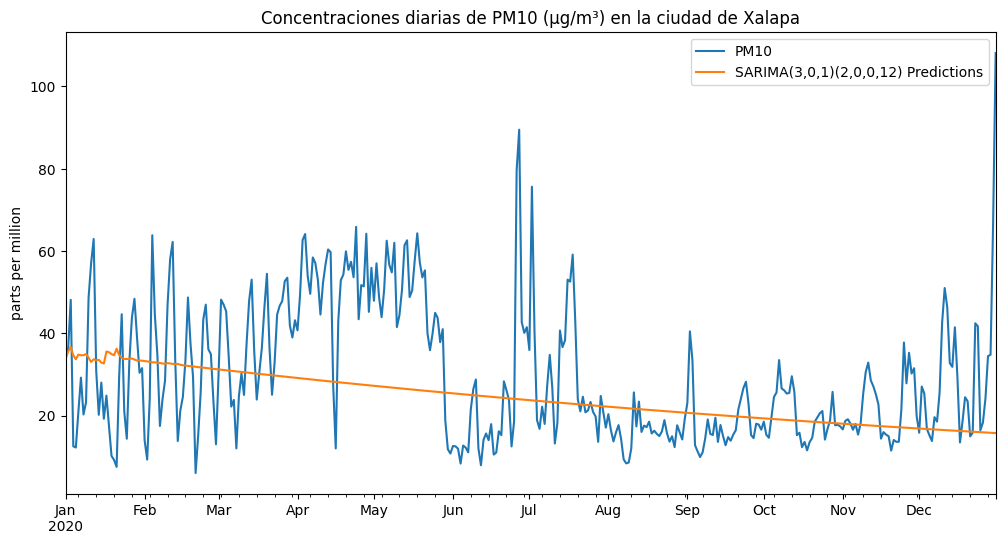

In [ ]:
# Plot predictions against known values
title ='Concentraciones diarias de PM10 (µg/m³) en la ciudad de Xalapa'
ylabel='parts per million'
xlabel=''

ax = test['PM10'].plot(legend=True,figsize=(12,6),title=title)
predictions.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

In [ ]:
model = SARIMAX(df['PM10'],order=(3,0,1),seasonal_order=(2,0,0,12))
results = model.fit()
fcast = results.predict(len(df),len(df)+7).rename('SARIMA(0,1,1)(1,0,1,12) Forecast')
fcast.head()

,"SARIMA(0,1,1)(1,0,1,12) Forecast"
2021-01-01,86.906825
2021-01-02,60.197416
2021-01-03,46.697510
2021-01-04,43.309991
2021-01-05,44.771575


In [ ]:
print(fcast)

2021-01-01    86.906825
2021-01-02    60.197416
2021-01-03    46.697510
2021-01-04    43.309991
2021-01-05    44.771575
                ...    
2021-12-28    22.160667
2021-12-29    22.112947
2021-12-30    22.065330
2021-12-31    22.017815
2022-01-01    21.970403
Freq: D, Name: SARIMA(0,1,1)(1,0,1,12) Forecast, Length: 366, dtype: float64


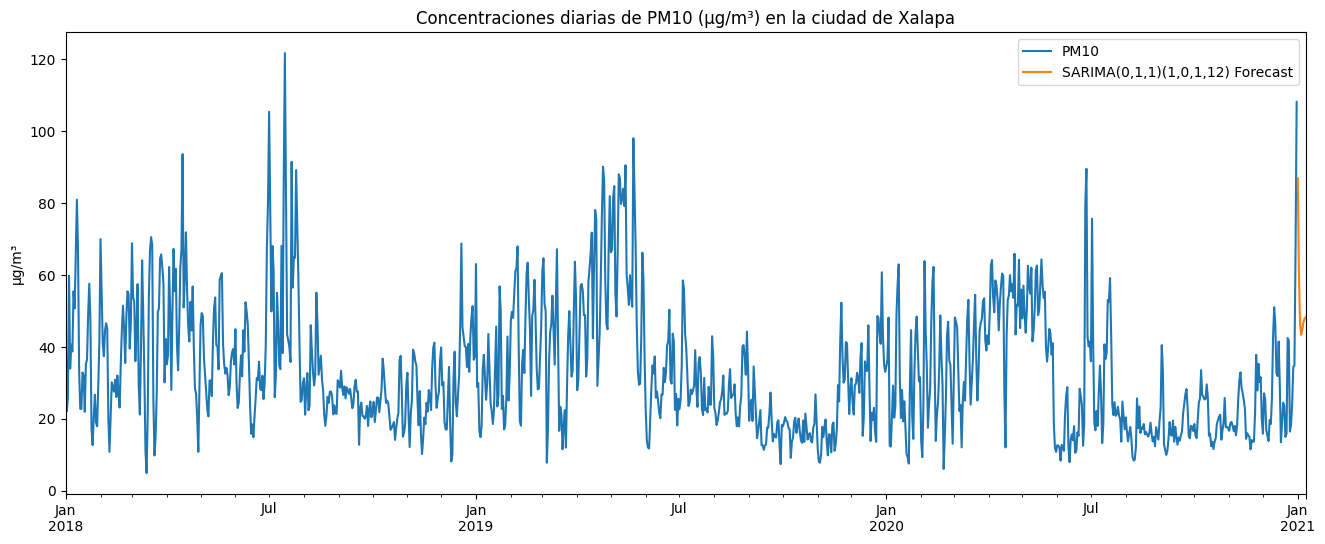

In [ ]:
# Plot predictions against known values
title = 'Concentraciones diarias de PM10 (µg/m³) en la ciudad de Xalapa'
ylabel='µg/m³'
xlabel=''

ax = df['PM10'].plot(legend=True,figsize=(16,6),title=title)
fcast.plot(legend=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

In [ ]:
# Evaluando métricas
import numpy as np

# MAE (Error Absoluto Medio)
mae = np.mean(np.abs(test['PM10'] - predictions))

# MSE (Error Cuadrático Medio)
mse = np.mean((test['PM10'] - predictions) ** 2)

# RMSE (Raíz del Error Cuadrático Medio)
rmse = np.sqrt(mse)

# MAPE (Porcentaje de Error Absoluto Medio)
# Asegurarse de que no haya ceros en los valores reales para evitar divisiones por cero
non_zero_test = test['PM10'][test['PM10'] != 0]
non_zero_predictions = predictions[non_zero_test.index]
mape = np.mean(np.abs((non_zero_test - non_zero_predictions) / non_zero_test)) * 100

# Imprimir las métricas
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAPE: {mape}%")


MAE: 12.164189532877172
MSE: 276.93903406421975
RMSE: 16.64148533227187
MAPE: 44.34753904427226%


In [ ]:
# Calcular los residuos
# Calcular los residuos
residuals = test['PM10'] - predictions

# Ver los primeros residuos
print(residuals.head())


date
2020-01-01     0.804748
2020-01-02     0.831442
2020-01-03    11.458788
2020-01-04   -22.123082
2020-01-05   -21.453149
Freq: D, dtype: float64


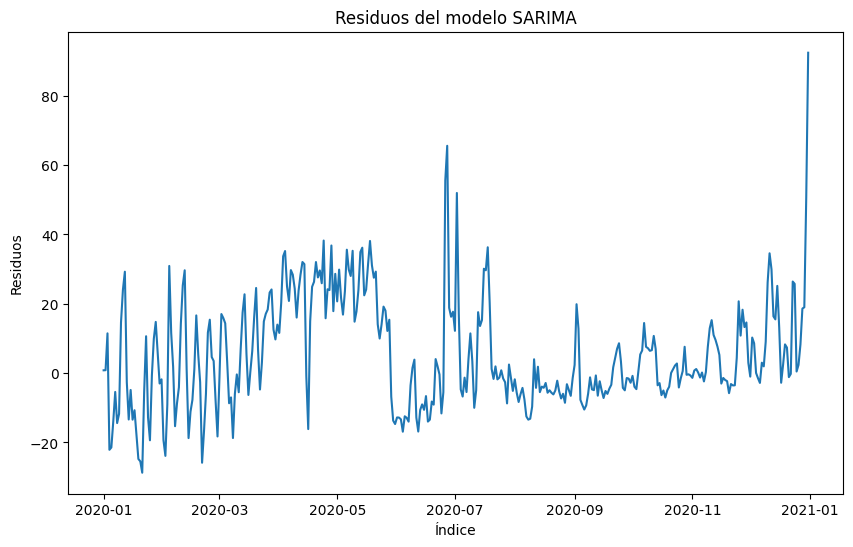

In [ ]:
import matplotlib.pyplot as plt

# Graficar los residuos
plt.figure(figsize=(10, 6))
plt.plot(residuals)
plt.title('Residuos del modelo SARIMA')
plt.xlabel('Índice')
plt.ylabel('Residuos')
plt.show()


<Figure size 1000x600 with 0 Axes>

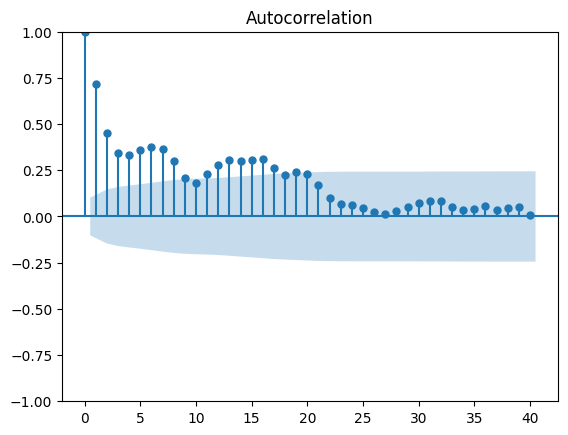

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf

# Graficar la autocorrelación de los residuos
plt.figure(figsize=(10, 6))
plot_acf(residuals, lags=40)  # Ajusta el número de lags según lo necesites
plt.show()


In [ ]:
from statsmodels.stats.diagnostic import acorr_ljungbox

# Realizar la prueba de Ljung-Box
ljung_box_result = acorr_ljungbox(residuals, lags=[20])  # Ajusta el número de lags según sea necesario
print(ljung_box_result)


       lb_stat      lb_pvalue
20  847.925846  9.348153e-167


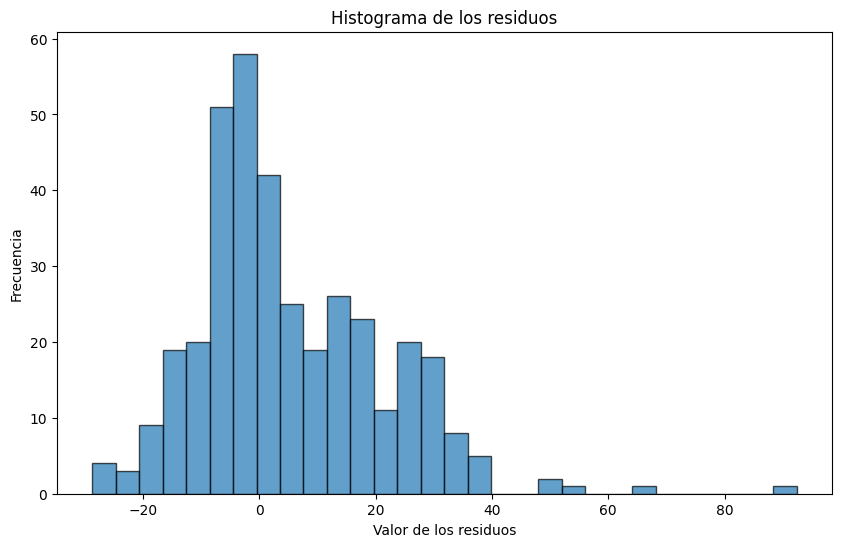

In [ ]:
# Graficar el histograma de los residuos
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30, edgecolor='k', alpha=0.7)
plt.title('Histograma de los residuos')
plt.xlabel('Valor de los residuos')
plt.ylabel('Frecuencia')
plt.show()


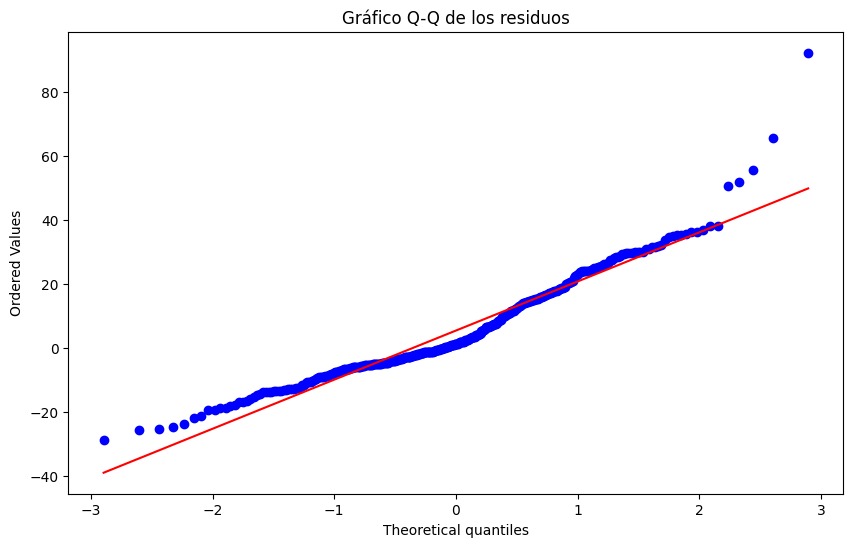

In [ ]:
import scipy.stats as stats

# Graficar el gráfico Q-Q
plt.figure(figsize=(10, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Gráfico Q-Q de los residuos')
plt.show()
